In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../data/abalone.csv')


In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [8]:
df.keys()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

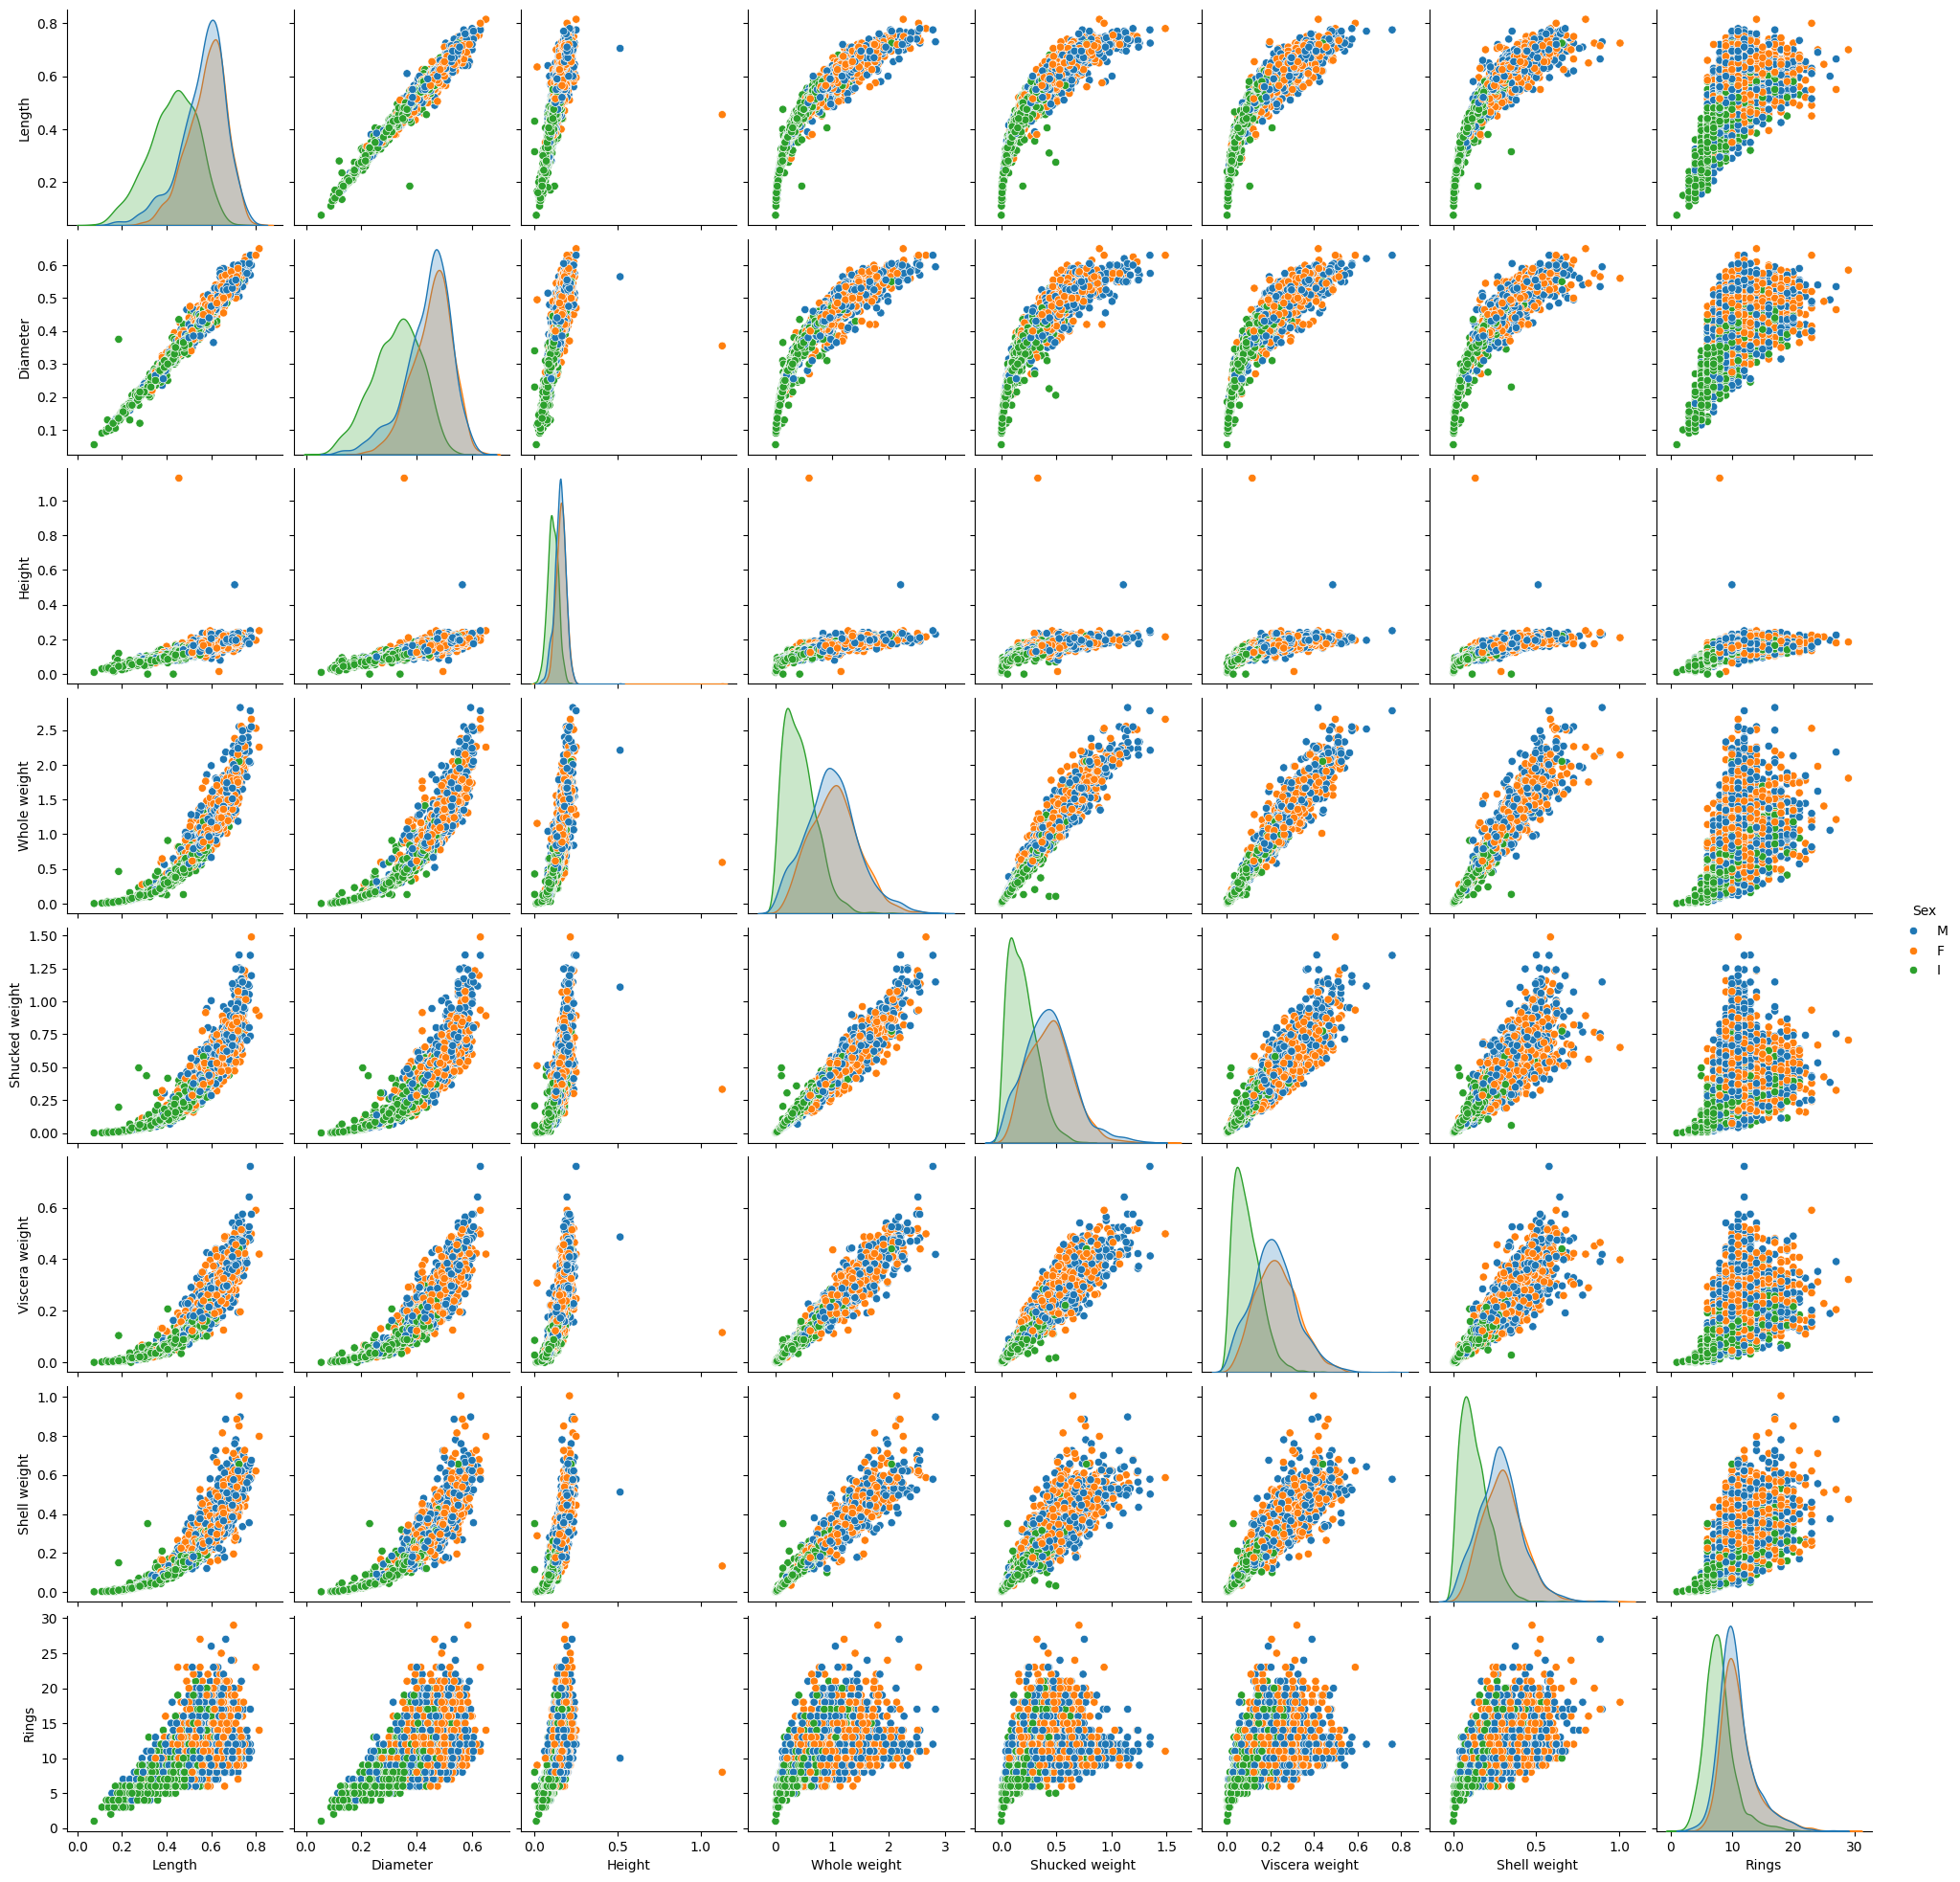

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the pairplot
sns.pairplot(df, hue='Sex')  # Use 'Sex' for color encoding
plt.show()

In [10]:
df.select_dtypes(include="number")

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [11]:
# Perform Shapiro-Wilk test for each numerical feature
from scipy.stats import shapiro
numerical_features= df.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    stat, p = shapiro(df[feature])
    print(f'Shapiro-Wilk test for {feature}: statistic={stat:.3f}, p-value={p:.3f}')


Shapiro-Wilk test for Length: statistic=0.970, p-value=0.000
Shapiro-Wilk test for Diameter: statistic=0.970, p-value=0.000
Shapiro-Wilk test for Height: statistic=0.890, p-value=0.000
Shapiro-Wilk test for Whole weight: statistic=0.972, p-value=0.000
Shapiro-Wilk test for Shucked weight: statistic=0.962, p-value=0.000
Shapiro-Wilk test for Viscera weight: statistic=0.968, p-value=0.000
Shapiro-Wilk test for Shell weight: statistic=0.970, p-value=0.000
Shapiro-Wilk test for Rings: statistic=0.931, p-value=0.000


In [12]:
'''Numerical Features and Categorical Features'''
nf = df.select_dtypes(include="number").columns
cf = df.select_dtypes(include="object").columns

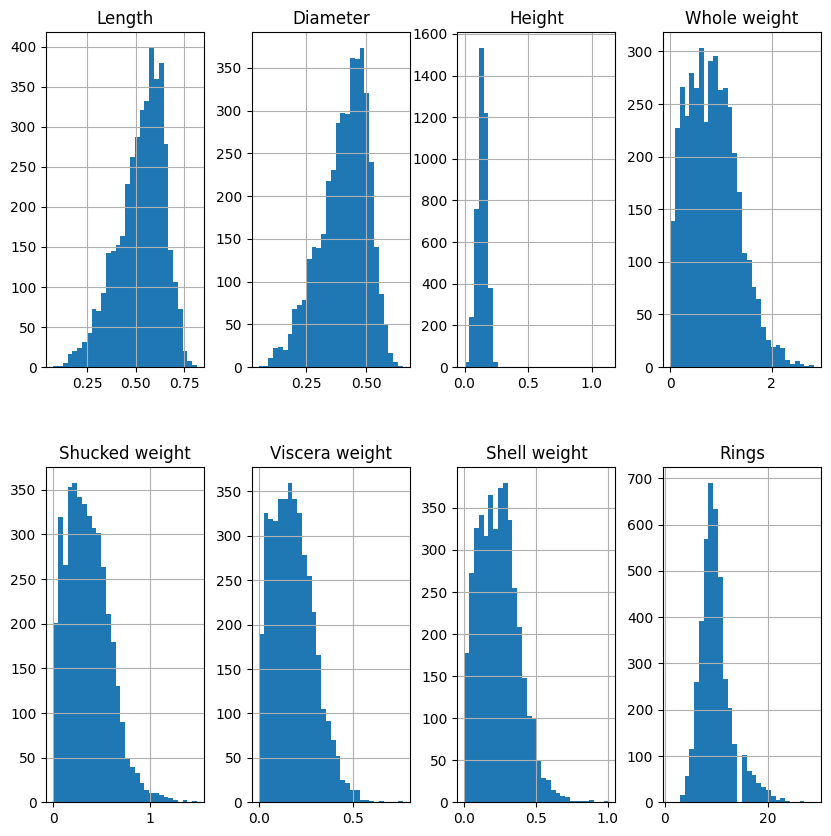

In [13]:
'''Histogram : numeric data distribution'''
df.hist(figsize=(10,10), grid = True, layout = (2,4), bins = 30)
plt.show()

In [14]:
# After Seeing Above Graph of Data Distribution, notice that  Data is skewed, So checking for Skewness '''
from scipy.stats import skew
skew_list = skew(df[nf],nan_policy='omit') #sending all numerical features and omitting nan values
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [15]:
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


# **Interpreting the Results**

**Height**: Highly positive skewness (3.128). This suggests that the Height distribution has a long tail on the right side, with most values concentrated on the lower end and some very high values pulling the tail to the right.

**Rings, Shucked weight, Shell weight, Viscera weight, Whole weight**: These features also have positive skewness, indicating right-skewed distributions.

**Diameter, Length**: These features have negative skewness, suggesting left-skewed distributions.
- According to the rules

For a normally Distributed Data, Skewness should be greater than 0
Skewness > 0 , More weight is on the right tail of the distribution

In [16]:
# Missing Values '''
mv_df = df.isnull().sum().sort_values(ascending = False)
pmv_df = (mv_df/len(df)) * 100
missing_df = pd.concat([mv_df,pmv_df], axis = 1, keys = ['Missing Values','% Missing'])

In [17]:
missing_df

,Missing Values,% Missing
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0
Rings,0,0.0


In [18]:
# Target Column Analysis'''
print("Value Count of Rings Column")
print(df.Rings.value_counts())
print("\nPercentage of Rings Column")
print(df.Rings.value_counts(normalize = True))

Value Count of Rings Column
Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
29      1
26      1
2       1
25      1
Name: count, dtype: int64

Percentage of Rings Column
Rings
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
24    0.000479
27    0.000479
1     0.000239
29    0.000239
26    0.000239
2     0.000239
25    0.000239
Name: proportion, dtype: float64


In [19]:
df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

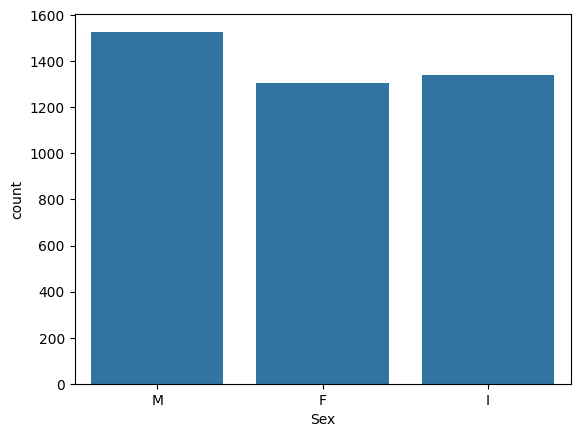

In [20]:
# Sex Count of Abalone, M - Male, F - Female, I - Infant'''
import seaborn as sns
_= sns.countplot(x='Sex', data = df)

In [21]:
# Sex Ratio in Abalone'''
print("\nSex Count in Percentage")
print(df.Sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(df.Sex.value_counts())


Sex Count in Percentage
Sex
M    0.365813
I    0.321283
F    0.312904
Name: proportion, dtype: float64

Sex Count in Numbers
Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


In [22]:
# Small Feature Engineering, Deriving Age from Rings Column, Age = Rings + 1.5'''
df['Age'] = df['Rings'] + 1.5
df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categori

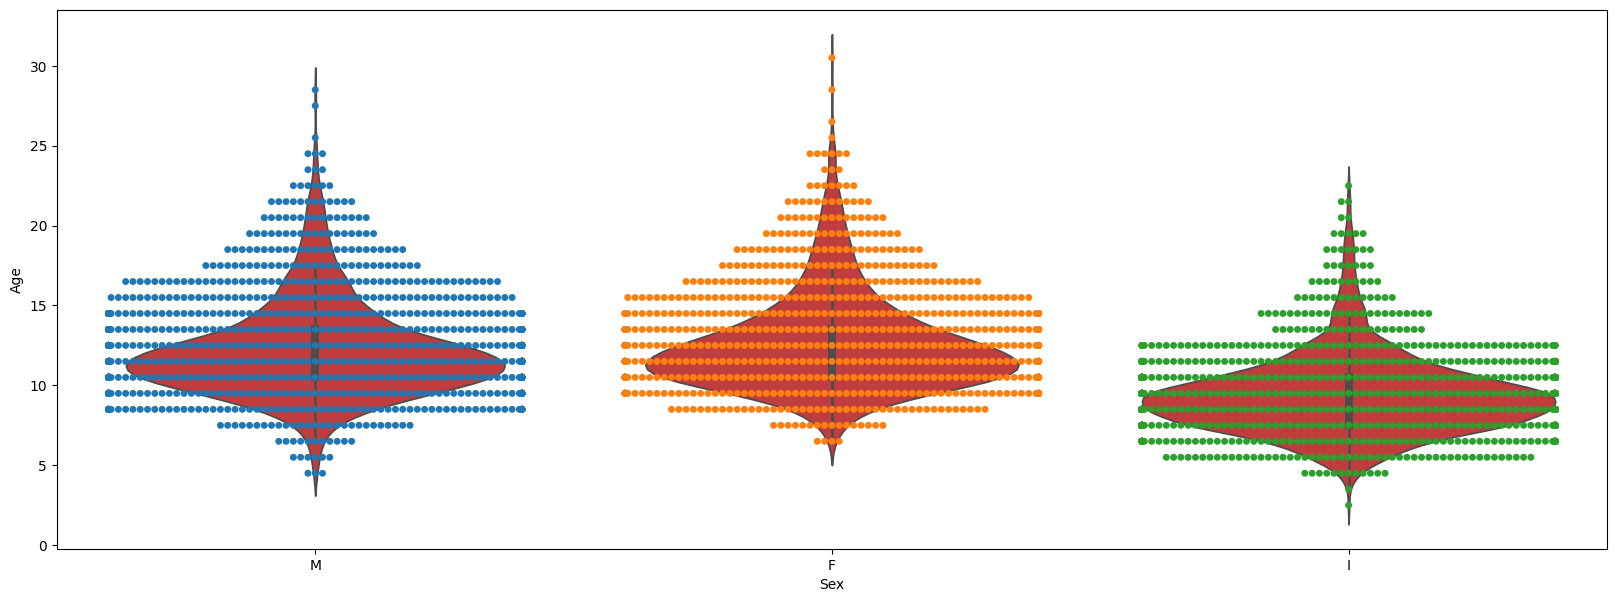

In [23]:
# Sex and Age Visulization'''
import matplotlib.pyplot as plt

plt.figure(figsize = (20,7))
_ =sns.swarmplot(x = 'Sex', y = 'Age', data = df, hue = 'Sex')
_ =sns.violinplot(x = 'Sex', y = 'Age', data = df)
plt.show()

In [24]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight',
                   'Shucked weight','Viscera weight', 'Shell weight', 'Age']].mean().sort_values(by = 'Age',ascending = False)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462


In [25]:
df[['Sex']]

,Sex
0,M
1,M
2,F
3,M
4,I
...,...
4172,F
4173,M
4174,M
4175,F


In [26]:
pd.get_dummies(df, columns=['Sex'], prefix=['Sex'])

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,False,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,True,False,False


In [27]:
#  One Hot Encoding for Sex Feature '''
from  sklearn.preprocessing  import OneHotEncoder

transformed_sex_feature = OneHotEncoder().fit_transform(df['Sex'].values.reshape(-1,1)).toarray()
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
df = pd.concat([df, df_sex_encoded], axis=1)

In [28]:
# '''Learning Features and Predicting Features'''
Xtrain = df.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = df['Rings']

In [29]:
# '''Train Test Split , 70:30 Ratio'''
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [30]:
# '''Creating Object of LogisticRegression'''
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
#'''Learning from Training Set'''
logreg.fit(X_train, Y_train)
#'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
#'''Accuracy Score'''
from sklearn.metrics import accuracy_score
result_acc = accuracy_score(Y_test,Y_pred)

In [32]:
# '''For Both, LabelEncoding and OneHotEncoding -> The accuracy is 25 %'''
result_acc

0.25815808556925307

In [33]:
 '''Creating New Target Variable '''
df['newRings'] = np.where(df['Rings'] > 10,1,0)

In [34]:
# '''Learning Features and Predicting Features'''
Xtrain = df.drop(['newRings','Rings','Age','Sex'], axis = 1)
Ytrain = df['newRings']

In [35]:
# '''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [36]:
# '''Creating Object of LogisticRegression'''
logreg = LogisticRegression()
#'''Learning from Training Set'''
logreg.fit(X_train, Y_train)
#'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)

In [37]:
# '''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred)
result_acc

0.7708484408992023

In [38]:
# '''Importing SVM from SK-Learn'''
from sklearn import svm

In [39]:
# '''Learning Features and Predicting Features'''
Xtrain = df.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = df['Rings']

In [40]:
# '''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [41]:
#'''Creating Object of SVM'''
svmModel = svm.SVC(kernel='linear', C=1, gamma=1)
#'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
#'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)

In [42]:
# '''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred)
result_acc

0.37128353879622916

In [43]:
#'''Creating Object of SVM'''
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100)
#'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
#'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)

In [44]:
# '''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred)
result_acc

0.38143582306018853

- We can see, the Model Accuracy has increased with Tweaking SVM parameters, it is now 38 percent.
- Lets Try to reduce the number of classes and see how the model is performing

In [45]:
# '''Making a Copy of the primary DataSet'''
new_df = df.copy()

In [46]:
#'''Feature Engineering , class 1 - 1-8, class 2 - 9-8, class 3 - 11 >'''
new_df['newRings_1'] = np.where(df['Rings'] <= 8,1,0)
new_df['newRings_2'] = np.where(((df['Rings'] > 8) & (df['Rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(df['Rings'] > 10,3,0)

In [47]:
new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [ ]:
# '''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [49]:
# '''Creating Object of SVM'''
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100)
# '''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
# '''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)

In [50]:
# '''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred)
result_acc

0.38143582306018853

In [66]:
# تقسيم البيانات :  تدريب &  اختبار
from sklearn.model_selection import train_test_split
X = df.drop(['Rings','Age','Sex'], axis = 1)
y = df['Rings']
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

In [67]:
X_train.shape, X_test.shape

((2798, 11), (1379, 11))

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector

from sklearn.pipeline import make_pipeline


cat_pipeline= make_pipeline(
    OneHotEncoder(drop='if_binary', sparse_output=False)  #      اسقاط احد العمودين في حالة المتغير الثنائي
)

preprocess= make_column_transformer(
     (cat_pipeline, selector(dtype_include="object")) , #category  كان بالامكان تغيير  نوع المتغيرات الى تصنيف
     remainder="passthrough"  # واسقاط باقي البيانات الغير رقمية
     )

In [69]:
# التحقق من تحويل  البيانات
preprocess.fit_transform(X_train)[1]

array([0.465, 0.36 , 0.105, 0.431, 0.172, 0.107, 0.175, 0.   , 0.   ,
       1.   , 0.   ])

In [70]:

#  هيكل نموذج خوارزمية التنبؤ
from xgboost  import XGBClassifier
from sklearn.decomposition import PCA
pipe_XGBCl= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية
    PCA( ),  #    يعوض لاحقا ضمن المعايير أدناه

    XGBClassifier()
)

In [71]:
from sklearn import set_config
set_config(display='diagram', )

In [73]:
y_train

1593     8
111      9
3271    17
1089     7
2918     9
        ..
3444     9
466     12
3092    11
3772     9
860      6
Name: Rings, Length: 2798, dtype: int64

In [72]:
# تدريب البيانات
pipe_XGBCl.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27], got [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 29]

In [65]:
#pipeline  معايير
list(pipe_XGBCl.get_params().keys())

['memory',
 'steps',
 'transform_input',
 'verbose',
 'columntransformer',
 'pca',
 'xgbclassifier',
 'columntransformer__force_int_remainder_cols',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__verbose_feature_names_out',
 'columntransformer__pipeline',
 'columntransformer__pipeline__memory',
 'columntransformer__pipeline__steps',
 'columntransformer__pipeline__transform_input',
 'columntransformer__pipeline__verbose',
 'columntransformer__pipeline__onehotencoder',
 'columntransformer__pipeline__onehotencoder__categories',
 'columntransformer__pipeline__onehotencoder__drop',
 'columntransformer__pipeline__onehotencoder__dtype',
 'columntransformer__pipeline__onehotencoder__feature_name_combiner',
 'columntransformer__pipeline__onehotencoder__handle_unknown',
 'columntransformer__pipeline__onehotencod

In [ ]:
param_grid = {
   'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgbclassifier__max_depth': range(3, 5),
    'xgbclassifier__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'xgbclassifier__gamma': [i/10.0 for i in range(3)],
    'pca__n_components':[40, 60, 80]

}

In [ ]:
# Define cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
# AUC and accuracy as score
from sklearn.metrics import accuracy_score, make_scorer
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}



In [ ]:
# %%timeit
from sklearn.model_selection import RandomizedSearchCV
gridSearch = RandomizedSearchCV(pipe_XGBCl, param_distributions=param_grid, cv=kf, verbose=3, n_jobs=-1 ,scoring= scoring  , n_iter=1000, refit="AUC" )

In [ ]:
# التدريب
gridSearch.fit(X_train, y_train)

In [ ]:
# افضل المعايير التي تم الاحتفاظ بها
gridSearch.best_params_

In [ ]:
#  قائمة أفضل المعاييير
gridSearch.best_estimator_

In [ ]:
#AUC    قياس درجة  دقة  التنبؤ لمعيار
print('Best AUC Score: {}'.format(gridSearch.best_score_))


In [ ]:
y_pred=gridSearch.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
# قياس الدقة في ضوء أفضل المعايير
gridSearch.best_estimator_.score(X_test, y_test)